# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 5 submission</b></u>

### Roster Name: Nand Kishore Khuswaha
### Student ID: 013920192
### Email address: nandkishore.khuswaha@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

1) DecisionTrees.Breast.ipynb (class files)

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
# 1.Load the data.
datafile = pd.read_csv("/Users/becoming1/Desktop/homework5_input_data.csv")

In [4]:
print(datafile)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
5        e         x           y         y       t    a               f   
6        e         b           s         w       t    a               f   
7        e         b           y         w       t    l               f   
8        p         x           y         w       t    p               f   
9        e         b           s         y       t    a               f   
10       e         x           y         y       t    l               f   
11       e         x           y         y       t    a               f   
12       e         b     

In [5]:
X= datafile.loc[ : ,datafile.columns != 'class']
Y = datafile['class']
class_names = ['p', 'e']

In [6]:
# 2.Convert categorical variable to numeric 
X_numeric = pd.get_dummies(X, columns = X.columns, prefix= X.columns)
X_numeric.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
# 3. Break the data into the training and test datasets.
X_train, X_test, Y_train, Y_test = train_test_split(X_numeric, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6499, 117), (6499,), (1625, 117), (1625,))

In [8]:
# 4.Train a decision tree model to predict the class variable
model = DecisionTreeClassifier(random_state=0)

# we can first score our model through cross validation (applicable to any supervised model we learn)
cross_val_score(model, X_train, Y_train, cv=5)

array([1., 1., 1., 1., 1.])

In [9]:
# 4.Run and report results from 5-fold cross-validation
crosValAcc = cross_val_score(model, X_train, Y_train,cv=5)
crossValAccstr = str(crosValAcc) 
print('Individual accuracies: ' + crossValAccstr)
meanAcc = sum(crosValAcc/5)
print('Mean Accuracy : {:.2f}'.format(meanAcc))

Individual accuracies: [1. 1. 1. 1. 1.]
Mean Accuracy : 1.00


In [10]:
# 5. Train a decision tree model on all the training data  
# and report prediction accuracy on the test data.
model.fit(X_train, Y_train)

print('Accuracy on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.00


Confusion matrix, without normalization
[[852   0]
 [  0 773]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


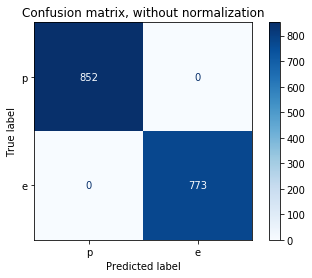

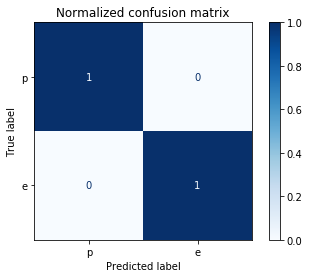

In [11]:
# 8.Plot two confusion matrices for test set predictions 
np.set_printoptions(precision=2)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
